In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D


network = Sequential()
network.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(64, 64, 3), activation='relu'))
network.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
network.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
network.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
network.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Flatten())
network.add(Dense(256, activation='relu'))
network.add(Dropout(0.5))

network.add(Dense(256, activation='relu'))
network.add(Dropout(0.5))

network.add(Dense(1))
network.add(Activation('sigmoid'))


from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop

mdp = ModelCheckpoint("./best_accuracy.pth", monitor='val_acc', save_best_only=True)
#network.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
network.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

Using TensorFlow backend.
/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  import sys
/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  
/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/artem/Programs/anaconda3/envs/deep_learning_default/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="s

In [2]:
import os
import cv2
import numpy as np


def create_dataset(data_path):
    global cats, dogs
    dsize = (64, 64)

    positive_data_path = os.path.join(data_path,"positive_examples")
    negative_data_path = os.path.join(data_path, "negative_examples")

    positive_image_names = os.listdir(positive_data_path)
    negative_image_names = os.listdir(negative_data_path)

    images, answers = [], []

    for image_name in positive_image_names:
        img = cv2.imread(os.path.join(positive_data_path, image_name))
        img = cv2.resize(img, dsize=dsize, interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        answers.append(1)

    for image_name in negative_image_names:
        img = cv2.imread(os.path.join(negative_data_path, image_name))
        img = cv2.resize(img, dsize=dsize, interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        answers.append(0)

    images = np.array(images).reshape(-1, 64, 64, 3)
    return images/255, np.array(answers)


X_train, y_train = create_dataset("./dataset/train");
X_test, y_test = create_dataset("./dataset/test");

### Lets look at what we got

In [3]:
len(X_train),len(X_test)

(40343, 1401)

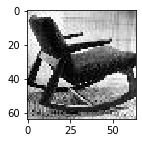

In [6]:
import matplotlib.pyplot as plt
random_index = np.random.randint(0, len(X_train))
plt.figure(figsize=(2,2))
plt.imshow(X_train[random_index])
plt.show()

In [7]:
from keras.preprocessing.image import ImageDataGenerator


# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)
datagen = ImageDataGenerator()
datagen.fit(X_train)

## Now lets start learning process. I have used the loss history to find out whether overfitting had happened or not

In [8]:
# history=network.fit_generator(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train)/32,
#             validation_data=(X_test, y_test), epochs=100,
#             callbacks=[mdp], shuffle=True)
history=network.fit(X_train, y_train, batch_size=64, epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[mdp], shuffle=True)

Train on 40343 samples, validate on 1401 samples
Epoch 1/100
40343/40343 [==============================] - 28s 690us/step - loss: 0.6643 - acc: 0.5894 - val_loss: 0.6257 - val_acc: 0.6809
Epoch 2/100
40343/40343 [==============================] - 24s 606us/step - loss: 0.5869 - acc: 0.6934 - val_loss: 0.5929 - val_acc: 0.6874
Epoch 3/100
40343/40343 [==============================] - 24s 604us/step - loss: 0.5298 - acc: 0.7386 - val_loss: 0.5606 - val_acc: 0.7209
Epoch 4/100
40343/40343 [==============================] - 24s 606us/step - loss: 0.4809 - acc: 0.7721 - val_loss: 0.5418 - val_acc: 0.7459
Epoch 5/100
40343/40343 [==============================] - 24s 606us/step - loss: 0.4296 - acc: 0.8023 - val_loss: 0.4976 - val_acc: 0.7773
Epoch 6/100
40343/40343 [==============================] - 24s 607us/step - loss: 0.3885 - acc: 0.8268 - val_loss: 0.4936 - val_acc: 0.7737
Epoch 7/100
40343/40343 [==============================] - 25s 608us/step - loss: 0.3515 - acc: 0.8450 - val_lo

Epoch 59/100
40343/40343 [==============================] - 24s 585us/step - loss: 0.0308 - acc: 0.9918 - val_loss: 1.0294 - val_acc: 0.8651
Epoch 60/100
40343/40343 [==============================] - 24s 584us/step - loss: 0.0282 - acc: 0.9920 - val_loss: 0.8098 - val_acc: 0.8808
Epoch 61/100
40343/40343 [==============================] - 24s 583us/step - loss: 0.0276 - acc: 0.9919 - val_loss: 0.7461 - val_acc: 0.8708
Epoch 62/100
40343/40343 [==============================] - 24s 584us/step - loss: 0.0282 - acc: 0.9925 - val_loss: 0.9184 - val_acc: 0.8729
Epoch 63/100
40343/40343 [==============================] - 24s 583us/step - loss: 0.0263 - acc: 0.9923 - val_loss: 0.9134 - val_acc: 0.8608
Epoch 64/100
40343/40343 [==============================] - 24s 585us/step - loss: 0.0280 - acc: 0.9924 - val_loss: 1.0753 - val_acc: 0.8608
Epoch 65/100
40343/40343 [==============================] - 24s 583us/step - loss: 0.0300 - acc: 0.9914 - val_loss: 0.6797 - val_acc: 0.8779
Epoch 66/100


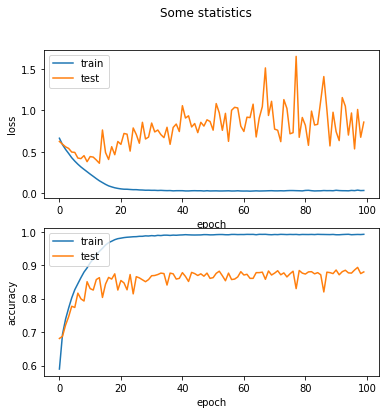

In [14]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,6))
fig.suptitle('Some statistics')

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend(['train', 'test'], loc='upper left');

ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'test'], loc='upper left')

The probability of cat is 100.0 %


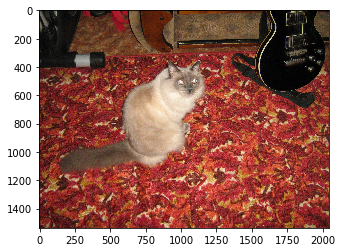

In [15]:
path="/mnt/volume1/Photo/Старый фотоальбом/Это просто мы/IMG_0210.jpg"
original_img = cv2.imread(path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img = cv2.resize(original_img, dsize=(64,64), interpolation=cv2.INTER_LINEAR)[None]
print(f"The probability of cat is {network.predict(img)[0][0]*100} %")

plt.imshow(original_img)
plt.show()

## Lets draw roc auc curve

In [16]:
y_predicted=network.predict_proba(X_test)

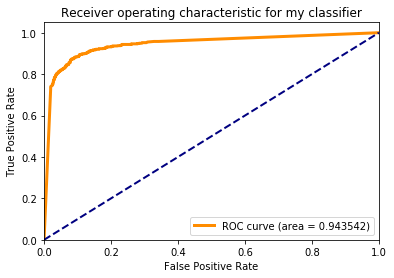

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, _ = roc_curve(y_test, y_predicted)
auc_score = roc_auc_score(y_test, y_predicted)

plt.plot(fpr, tpr, color='darkorange',
         lw=3, label='ROC curve (area = %f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic for my classifier')
plt.legend(loc="lower right")

In [21]:
from tensorflow import lite
network.save("custom_model.h5")

converter = lite.TFLiteConverter.from_keras_model_file( 'custom_model.h5')
tfmodel = converter.convert()
open ("custom_model.tflite" , "wb") .write(tfmodel)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 22 variables.
INFO:tensorflow:Converted 22 variables to const ops.


9153228